# Logistic Regression For Imbalanced Dataset

In [39]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [40]:
# Generate and plot a synthetic imbalanced classification dataset 
from collections import Counter 
from sklearn.datasets import make_classification

In [41]:
# Imbalanced dataset 
X,y = make_classification(n_samples=10000, n_features=2, n_clusters_per_class=1,
                          n_redundant=0,weights=[0.99],random_state=10)

In [42]:
X

array([[ 1.87991016, -1.4850347 ],
       [ 0.37708311, -2.23858488],
       [ 1.35431163, -2.66463822],
       ...,
       [ 0.99509904, -0.54192355],
       [ 1.75859359, -1.54961188],
       [ 0.79770543, -1.99467372]], shape=(10000, 2))

In [43]:
print(Counter(y))

Counter({np.int64(0): 9846, np.int64(1): 154})


<Axes: >

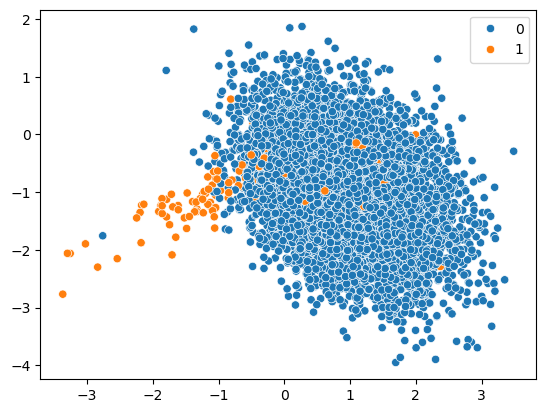

In [44]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue = y)

In [45]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=42)

In [46]:
# HyperParameter Tuning 
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression()
params = {'penalty' :  ['l1', 'l2', 'elasticnet'],
          'C': [100,10,1,0.1,0.01],
          'solver' :['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
          'class_weight' : [{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]}


In [47]:
params

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [100, 10, 1, 0.1, 0.01],
 'solver': ['lbfgs',
  'liblinear',
  'newton-cg',
  'newton-cholesky',
  'sag',
  'saga'],
 'class_weight': [{0: 1, 1: 1},
  {0: 1, 1: 10},
  {0: 1, 1: 50},
  {0: 1, 1: 100},
  {0: 10, 1: 1},
  {0: 10, 1: 10},
  {0: 10, 1: 50},
  {0: 10, 1: 100},
  {0: 50, 1: 1},
  {0: 50, 1: 10},
  {0: 50, 1: 50},
  {0: 50, 1: 100},
  {0: 100, 1: 1},
  {0: 100, 1: 10},
  {0: 100, 1: 50},
  {0: 100, 1: 100}]}

In [48]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import StratifiedKFold 
cv = StratifiedKFold() 
grid = GridSearchCV(estimator=model,param_grid=params,scoring="accuracy", cv=cv)

In [49]:
grid.fit(X_train,y_train)

,estimator,LogisticRegression()
,param_grid,"{'C': [100, 10, ...], 'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10}, ...], 'penalty': ['l1', 'l2', ...], 'solver': ['lbfgs', 'liblinear', ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,StratifiedKFo...shuffle=False)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l1'


In [50]:
grid.best_params_

{'C': 100, 'class_weight': {0: 50, 1: 10}, 'penalty': 'l1', 'solver': 'saga'}

In [51]:
grid.best_score_

np.float64(0.9882666666666667)

In [52]:
y_pred = grid.predict(X_test)

In [53]:
# now lets check the accuracy  
from  sklearn.metrics import accuracy_score,confusion_matrix,classification_report 
score = accuracy_score(y_test,y_pred)
matrix = confusion_matrix(y_test,y_pred)
report = classification_report(y_test,y_pred)

print("Accuracy_score", score)
print("Confision_metrix", matrix)
print("Classification_report", report)

Accuracy_score 0.9888
Confision_metrix [[2465    0]
 [  28    7]]
Classification_report               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2465
           1       1.00      0.20      0.33        35

    accuracy                           0.99      2500
   macro avg       0.99      0.60      0.66      2500
weighted avg       0.99      0.99      0.99      2500

